# Chapter 2 

In [1]:
from k_armed_testbed import Testbed, Bandit, weight_n, weight_1

In [2]:
bandits = [
    # different eps
    Bandit(eps=0, q1=0, weight=weight_n),
    Bandit(eps=0.01, q1=0, weight=weight_n),
    Bandit(eps=0.1, q1=0, weight=weight_n),
    
    # optimistic initial values with weighted average
    Bandit(eps=0, q1=5, weight=weight_1),
    Bandit(eps=0.1, q1=0, weight=weight_1),
    
    # upper confidence bound selection
    Bandit(eps=-1, q1=0, c=2, weight=weight_1),
    
    # gradient action preferences with softmax selection
    Bandit(q1=4, b=4, rb=True, alpha=0.1),
    Bandit(q1=4, b=4, rb=True, alpha=0.4),
    Bandit(q1=0, b=4, rb=False, alpha=0.1),
    Bandit(q1=0, b=4, rb=False, alpha=0.4),
]

t = Testbed(bandits=bandits)
t.run_tests()


Q1 = 0, eps = 0, w(n) = 1 / n


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 135.05it/s]


Percent Optimal:  37.9%, Average reward: 1.05238

Q1 = 0, eps = 0.01, w(n) = 1 / n


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 139.41it/s]


Percent Optimal:  60.9%, Average reward: 1.32204

Q1 = 0, eps = 0.1, w(n) = 1 / n


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 135.15it/s]


Percent Optimal:  79.5%, Average reward: 1.36885

Q1 = 5, eps = 0, w = 0.1


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 139.92it/s]


Percent Optimal:  87.0%, Average reward: 1.5618

Q1 = 0, eps = 0.1, w = 0.1


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:15<00:00, 132.51it/s]


Percent Optimal:  75.2%, Average reward: 1.28779

Q1 = 0, c = 2, w = 0.1


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:34<00:00, 57.65it/s]


Percent Optimal:  71.1%, Average reward: 1.38302

Q1 = 4, b = 4, a = 0.1, rb = True


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:34<00:00, 21.17it/s]


Percent Optimal:  85.4%, Average reward: 5.48367

Q1 = 4, b = 4, a = 0.4, rb = True


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:34<00:00, 21.15it/s]


Percent Optimal:  72.5%, Average reward: 5.48396

Q1 = 0, b = 4, a = 0.1, rb = False


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:34<00:00, 21.52it/s]


Percent Optimal:  48.5%, Average reward: 5.228

Q1 = 0, b = 4, a = 0.4, rb = False


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:34<00:00, 21.22it/s]


Percent Optimal:  27.1%, Average reward: 4.78429


## Graphs

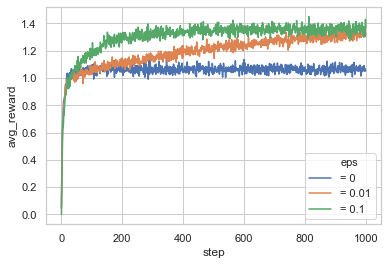

In [3]:
t.fig_2_2_a(bandits[:3])

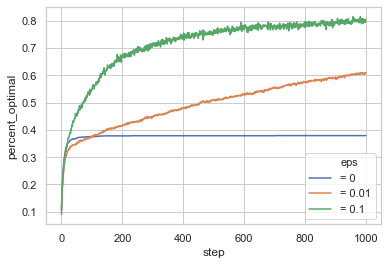

In [4]:
t.fig_2_2_b(bandits[:3])

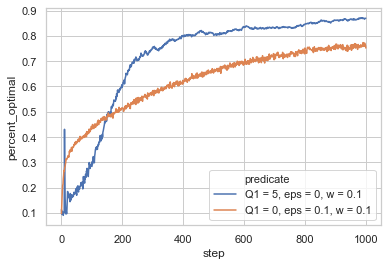

In [5]:
t.fig_2_3(bandits[3:5])

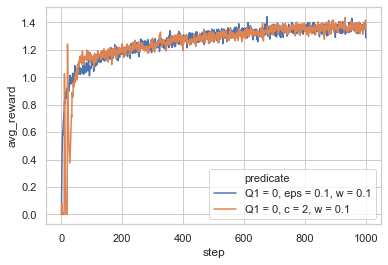

In [6]:
t.fig_2_4(bandits[4:6])

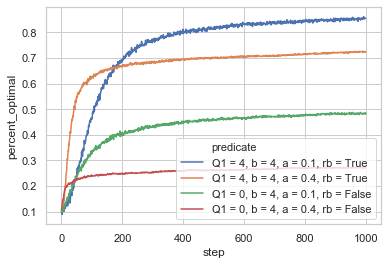

In [7]:
t.fig_2_5(bandits[6:10])

## Parameter Study

In [1]:
from k_armed_testbed import Testbed, Bandit, weight_n, weight_1
from utils import p_gen, flatten
from fractions import Fraction
import seaborn as sns
sns.set(style="whitegrid")

In [9]:
labels = ['e-greedy', 'gradient', 'UCB', 'greedy w/ optimistic init']
params = ['eps', 'alpha', 'c', 'Q1']
p_lookup = {x[0]: x[1] for x in zip(labels, params)}

bandits = [
    [Bandit(label=labels[0], eps=p) for p in p_gen(128, 6)],
    [Bandit(label=labels[1], alpha=p, rb=True) for p in p_gen(32, 8)],
    [Bandit(label=labels[2], c=p, eps=-1) for p in p_gen(16, 7)],
    [Bandit(label=labels[3], q1=p, eps=0.05, weight=weight_1) for p in p_gen(4, 5)]
]

t = Testbed(bandits=flatten(bandits), m=2000)
t.run_tests()
t.build_dataframe()


Q1 = 0, eps = 0.0078125, w(n) = 1 / n


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:15<00:00, 131.78it/s]


Percent Optimal:  59.3%, Average reward: 1.30403

Q1 = 0, eps = 0.015625, w(n) = 1 / n


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 135.80it/s]


Percent Optimal:  67.8%, Average reward: 1.41395

Q1 = 0, eps = 0.03125, w(n) = 1 / n


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 137.81it/s]


Percent Optimal:  75.6%, Average reward: 1.40342

Q1 = 0, eps = 0.0625, w(n) = 1 / n


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 135.64it/s]


Percent Optimal:  80.8%, Average reward: 1.39396

Q1 = 0, eps = 0.125, w(n) = 1 / n


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:15<00:00, 132.47it/s]


Percent Optimal:  78.9%, Average reward: 1.3133

Q1 = 0, eps = 0.25, w(n) = 1 / n


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:15<00:00, 131.53it/s]


Percent Optimal:  70.5%, Average reward: 1.1442

Q1 = 0, a = 0.03125, rb = True


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:38<00:00, 20.41it/s]


Percent Optimal:  83.7%, Average reward: 1.49076

Q1 = 0, a = 0.0625, rb = True


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:39<00:00, 20.08it/s]


Percent Optimal:  86.2%, Average reward: 1.50998

Q1 = 0, a = 0.125, rb = True


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:41<00:00, 20.36it/s]


Percent Optimal:  83.0%, Average reward: 1.53442

Q1 = 0, a = 0.25, rb = True


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:39<00:00, 20.03it/s]


Percent Optimal:  79.2%, Average reward: 1.46712

Q1 = 0, a = 0.5, rb = True


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:41<00:00, 19.62it/s]


Percent Optimal:  72.0%, Average reward: 1.46622

Q1 = 0, a = 1.0, rb = True


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:40<00:00, 19.81it/s]


Percent Optimal:  56.2%, Average reward: 1.32234

Q1 = 0, a = 2, rb = True


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:39<00:00, 20.09it/s]


Percent Optimal:  44.9%, Average reward: 1.21098

Q1 = 0, a = 4, rb = True


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:41<00:00, 19.61it/s]


Percent Optimal:  35.4%, Average reward: 0.96938

Q1 = 0, c = 0.0625, w(n) = 1 / n


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:34<00:00, 57.76it/s]


Percent Optimal:  70.5%, Average reward: 1.43244

Q1 = 0, c = 0.125, w(n) = 1 / n


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:34<00:00, 58.82it/s]


Percent Optimal:  72.7%, Average reward: 1.46717

Q1 = 0, c = 0.25, w(n) = 1 / n


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:36<00:00, 54.65it/s]


Percent Optimal:  78.8%, Average reward: 1.51917

Q1 = 0, c = 0.5, w(n) = 1 / n


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:32<00:00, 62.05it/s]


Percent Optimal:  88.4%, Average reward: 1.52079

Q1 = 0, c = 1.0, w(n) = 1 / n


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:36<00:00, 55.48it/s]


Percent Optimal:  92.4%, Average reward: 1.5386

Q1 = 0, c = 2, w(n) = 1 / n


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:37<00:00, 53.62it/s]


Percent Optimal:  86.2%, Average reward: 1.49719

Q1 = 0, c = 4, w(n) = 1 / n


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:35<00:00, 56.01it/s]


Percent Optimal:  71.5%, Average reward: 1.37612

Q1 = 0.25, eps = 0.05, w = 0.1


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:13<00:00, 150.93it/s]


Percent Optimal:  74.6%, Average reward: 1.40101

Q1 = 0.5, eps = 0.05, w = 0.1


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:13<00:00, 152.97it/s]


Percent Optimal:  80.0%, Average reward: 1.40766

Q1 = 1.0, eps = 0.05, w = 0.1


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 139.88it/s]


Percent Optimal:  82.3%, Average reward: 1.41349

Q1 = 2, eps = 0.05, w = 0.1


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:16<00:00, 118.81it/s]


Percent Optimal:  81.0%, Average reward: 1.37291

Q1 = 4, eps = 0.05, w = 0.1


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 140.46it/s]


Percent Optimal:  82.4%, Average reward: 1.4536


In [10]:
# map the various column parameters into single column and convert them to a fraction
samples_df = t.rewards_df
samples_df['p'] = samples_df \
    .drop(columns=['id', 'predicate']) \
    .apply(lambda x: str(Fraction(x[p_lookup[x['label']]][2:])), axis=1)

In [11]:
# average the steps for each param/label group
results_df = samples_df[['label', 'p', 'avg_reward']] \
    .groupby(['label', 'p'], as_index=False) \
    .mean()

# sort according to the correct fraction label order, for plotting
p_order = [str(Fraction(p)) for p in p_gen(128, 10)]
results_df = results_df.set_index('p').loc[p_order].reset_index()

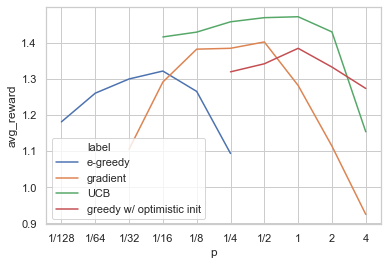

In [12]:
ax = sns.lineplot(x='p', y="avg_reward", hue="label", sort=False, data=results_df)